In [40]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile
import numpy as np

In [41]:
n_fft = 2048
win_length = None
hop_length = n_fft
n_mels = 128
sample_rate = 8000

- 读取音频: librosa.load(path, sr=22050, mono=True, offset=0.0, duration=None)
- 波形图: librosa.display.waveplot(y, sr=22050, x_axis='time', offset=0.0, ax=None)
- 计算Mel频谱: librosa.feature.melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', power=2.0)
- 绘制频谱图: librosa.display.specshow(data, x_axis=None, y_axis=None, sr=22050, hop_length=512)



In [42]:
clean_waveform, sample_rate = librosa.load("clean_data/19-198-0034.wav", duration=5)
mixed_waveform, sample_rate = librosa.load("mixed_data/19-198-0034.wav", duration=5)

mel = librosa.feature.melspectrogram(y=clean_waveform, sr=sample_rate)
mel_log = librosa.power_to_db(mel, ref=np.max)
mel_log_reverse = librosa.db_to_power(mel_log)

audio_signal_1 = librosa.feature.inverse.mel_to_audio(mel, sr=sample_rate)
audio_signal_2 = librosa.feature.inverse.mel_to_audio(mel_log_reverse, sr=sample_rate)
soundfile.write('test_1.wav', audio_signal_1, sample_rate)
soundfile.write('test_2.wav', audio_signal_2, sample_rate)

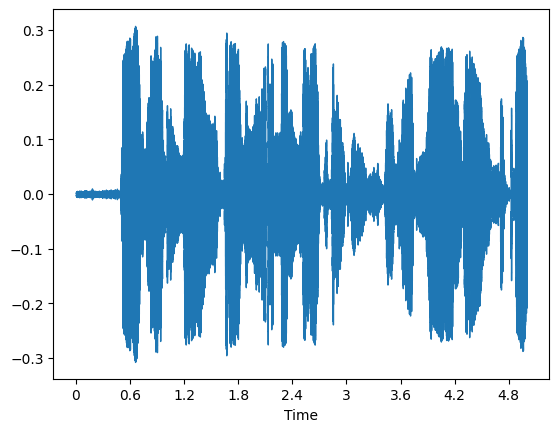

In [43]:
librosa.display.waveshow(clean_waveform, sr=sample_rate)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

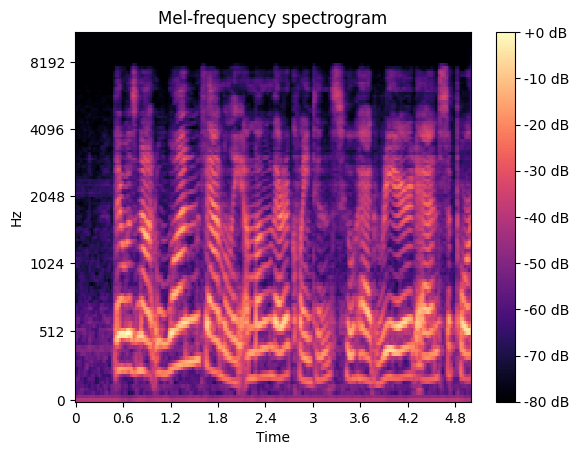

In [44]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

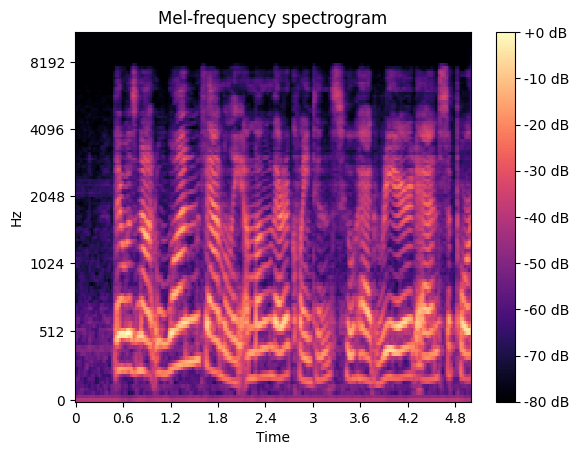

In [45]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mel_log, sr=sample_rate, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

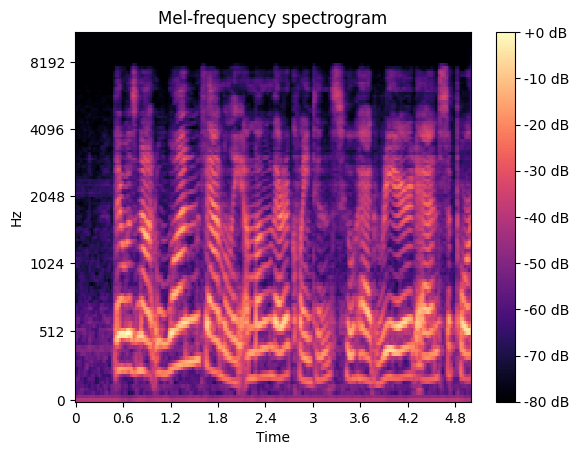

In [46]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.power_to_db(mel_log_reverse, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

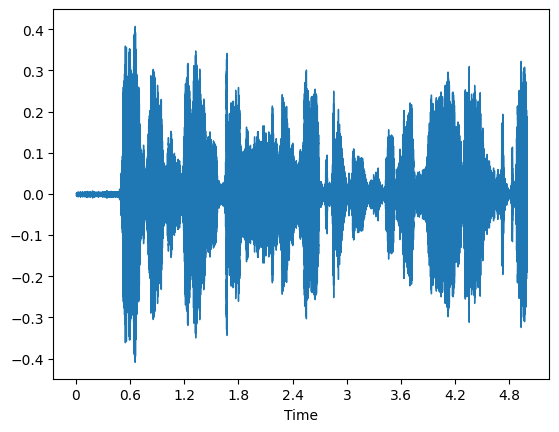

In [47]:
librosa.display.waveshow(audio_signal_1, sr=sample_rate)

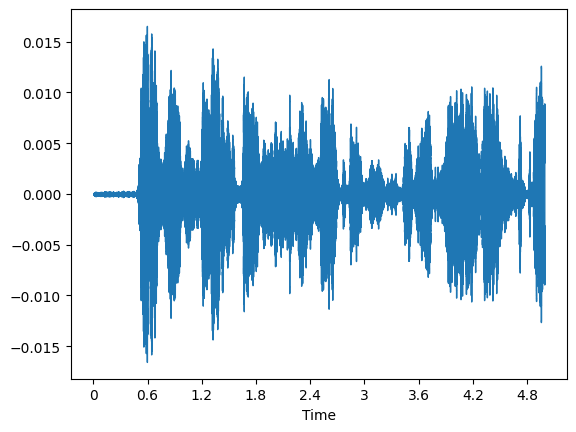

In [48]:
librosa.display.waveshow(audio_signal_2, sr=sample_rate)